# CAP 2751 - Data Science
***Include the following info by clicking here:***
* Name: Jasmin Spanioli
* Canvas Course Section: CAP 2751-1
* Date: 7/13/25
* Link to your Notebook: https://colab.research.google.com/drive/1iJ7P_H6TxTeh02k0MWtPWnOc7FHU6MIw?usp=sharing


# Assignment 3: Statistics and Probability Distributions
## STARTER

### Goals

- To transition from data analytics to basic statistical analysis.
- To expand upon the prior experience of manipulating, summarizing, and visualizing small datasets.
- To practice the computation and displaying of summary statistics, percentiles, PMFs and (E)CDFs.
- To display and interpret bee swarm plots and box-and-whisker plots.
- To visualize and compute pairwise correlations among variables in the dataset.
- To practice the computation and displaying of representative statistical distributions.
- To compute moments and skewness measures.
- To estimate the parameters of a distribution and propose a model that explains the underlying data.

### Instructions

- This assignment is structured in four parts, each using their own dataset(s).
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- The number of points is indicated next to each part. They add up to 100.
- There are additional (20 points worth of) bonus items, which are, of course optional.

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!**


---------
### Imports + Google Drive

In [2]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import scipy.stats as ss
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

-------------------
## Part 1: The Iris dataset

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each:
- sepal length in cm;
- sepal width in cm;
- petal length in cm; and
- petal width in cm.

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris['species'].nunique()

3

### Histogram and summary statistics

The code below can be used to display the histogram of versicolor petal lengths (with meaningful labels for the axes and default option for number of bins).

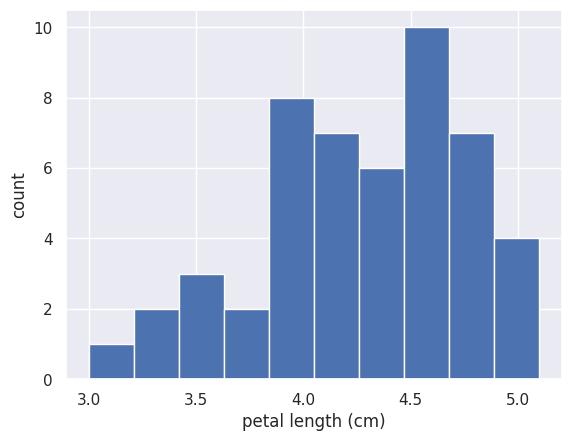

In [6]:
# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length
plt.hist(versicolor_petal_length)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

### 1.1 Your turn! (6 points)

Write code to:

1. Modify the histogram above, this time using the "square root rule" for the number of bins. (2 pts)

*The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.*

2. Modify the histogram above, such that the y axis shows probability/proportion (rather than absolute count), i.e., a proper PMF. (2 pts)

3. Compute summary statistics (1 pt each): mean and standard deviation

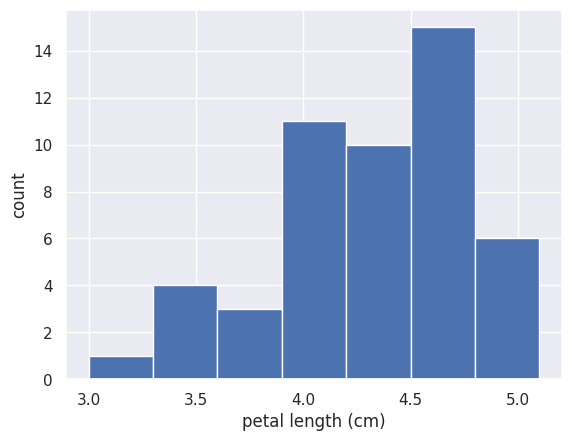

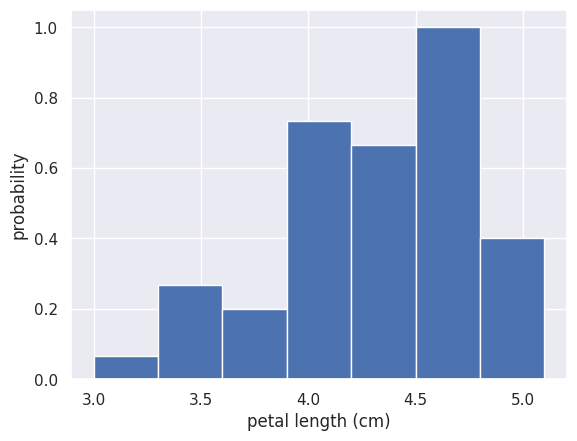

Mean: 4.26
Standard deviation: 0.4651881339845204


In [14]:
# Modification 1
# Square root rule for bins
num_bins = int(np.sqrt(len(versicolor_petal_length)))
plt.hist(versicolor_petal_length, bins=num_bins)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()

# Modification 2
# Y axis shows probability instead of count
plt.hist(versicolor_petal_length, bins=num_bins, density=True)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('probability')

# Show histogram
plt.show()

# Summary statistics
# Compute mean
print('Mean:', np.mean(versicolor_petal_length))

# Compute standard deviation
print('Standard deviation:', np.std(versicolor_petal_length))

### 1.2 Your turn! (3 points)

Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species (properly labeld), and the y-axis the petal lengths.

Your plot should look like this:

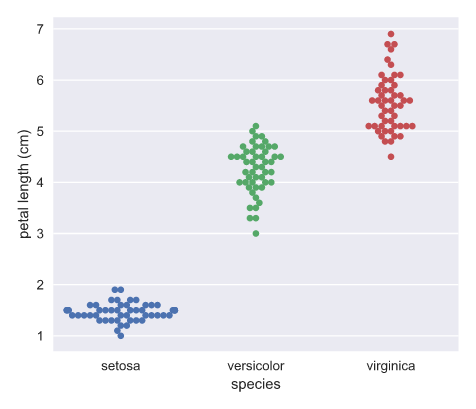


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


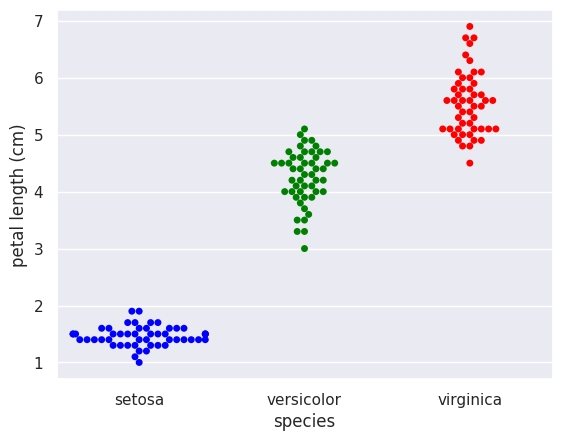

In [66]:
# Reset the seaborn default
sns.set()

# Create palette
palette = {'setosa': 'blue', 'versicolor': 'green', 'virginica': 'red'}

# Bee swarm plot
sns.swarmplot(x='species', y='petal_length', hue='species', data=iris, palette=palette)

# Label axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show plot
plt.show()


### Empirical Cumulative Distribution Function (ECDF)

The function below takes as input a 1D array of data and then returns the x and y values of the ECDF.

In [42]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### 1.3 Your turn! (6 points)

Use the ``ecdf()`` function above to compute the ECDF for the petal lengths of the Iris versicolor flowers (3 pts) and plot the resulting ECDF (3 pts).

Your plot should look like this:

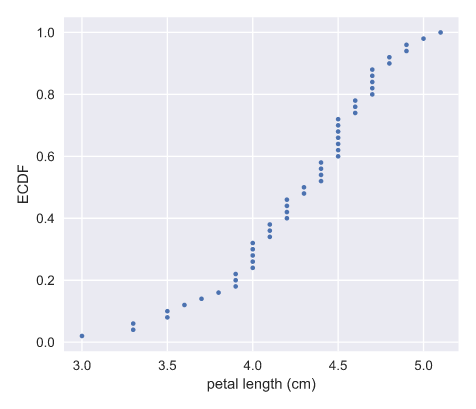

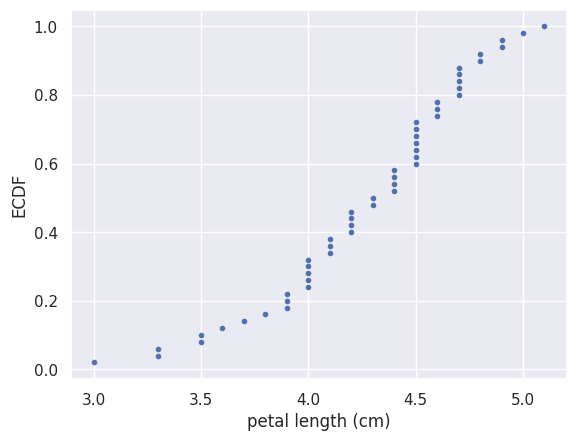

In [52]:
# Use it on versicolor petal lengths
x_vers, y_vers = ecdf(versicolor_petal_length)

# Plot the ECDF
plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Labels
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Show plot
plt.show()


### 1.4 Your turn! (4 points)

Write code to plot ECDFs for the petal lengths of all three iris species.

Your plot should look like this:

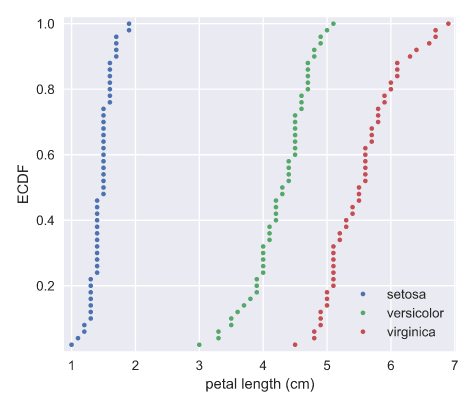

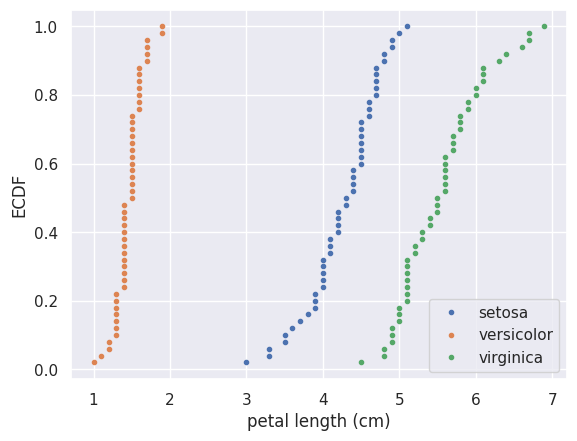

In [56]:
# Filter the petal length for each species
setosa_petal_length = iris[iris.species == 'setosa'].petal_length
virginica_petal_length = iris[iris.species == 'virginica'].petal_length

# Compute ECDFs
x_vers, y_vers = ecdf(versicolor_petal_length)
x_seto, y_seto = ecdf(setosa_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot the ECDFs
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_seto, y_seto, marker='.', linestyle='none')
plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Labels
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')
plt.legend(('setosa', 'versicolor', 'virginica'))

# Show plot
plt.show()


### Percentiles

The code below computes the 25th, 50th, and 75th percentiles for the petal lengths of the Iris versicolor species and overlays the results on top of the ECDF.

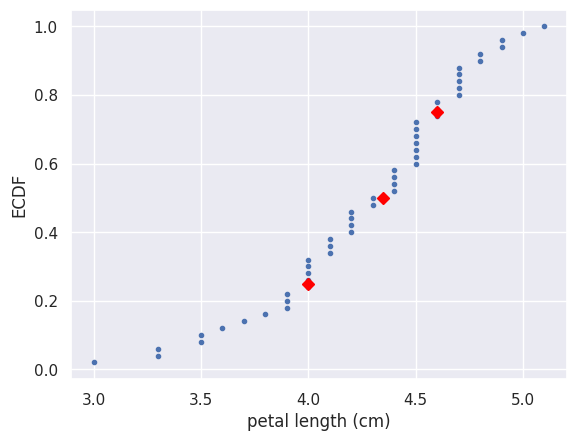

In [57]:
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles
ptiles_versicolor = np.percentile(versicolor_petal_length, percentiles)
x_vers,y_vers = ecdf(versicolor_petal_length)

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_versicolor, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

### 1.5 Your turn! (5 points)

Write code to compute the 25th, 50th, and 75th percentiles for the petal lengths of and plot the resulting values overlaid with the corresponding ECDFs for all three iris species.

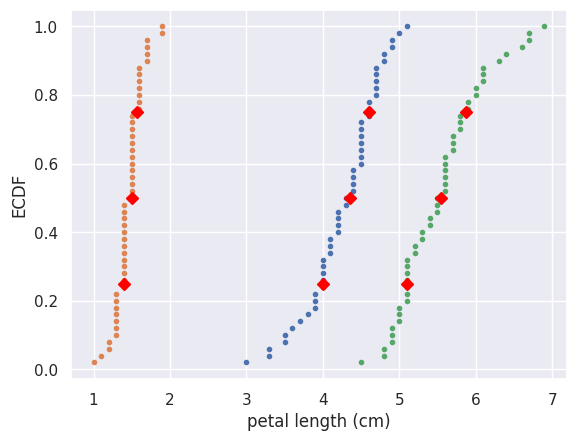

In [59]:
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles
ptiles_versicolor = np.percentile(versicolor_petal_length, percentiles)
ptiles_setosa = np.percentile(setosa_petal_length, percentiles)
ptiles_virginica = np.percentile(virginica_petal_length, percentiles)

# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.plot(x_seto, y_seto, '.')
_ = plt.plot(x_virg, y_virg, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_versicolor, percentiles/100, marker='D', color='red',
         linestyle='none')
_ = plt.plot(ptiles_setosa, percentiles/100, marker='D', color='red',
         linestyle='none')
_ = plt.plot(ptiles_virginica, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

### Box-and-whisker plots

Box-and-whisker plots (or simply box plots) show the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

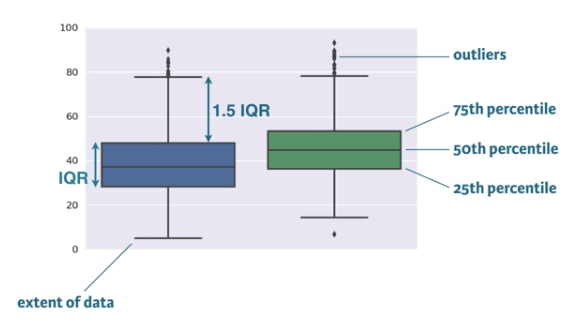


### 1.6 Your turn! (5 points)

Write code to display the box-and-whisker plot for the petal lengths of all three iris species.

Your plot should look like this:

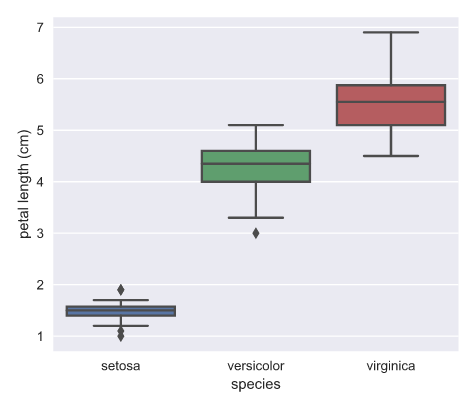

/tmp/ipython-input-72-17835268.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal_length', data=iris, palette=palette)


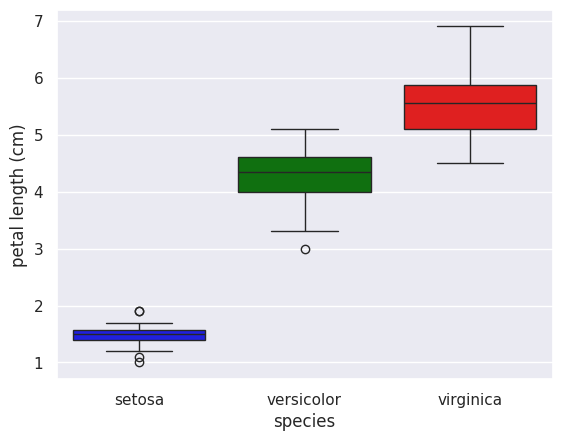

In [72]:
# Default style
sns.set()

# Box plot
sns.boxplot(x='species', y='petal_length', data=iris, palette=palette)

# Labels
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show plot
plt.show()



### 1.7 Bonus! (5 points)

Write code to display the box-and-whisker plot combined with the bee swarm plot for the petal lengths of all three iris species.

/tmp/ipython-input-77-2873002061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y='petal_length', data=iris, palette=palette)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


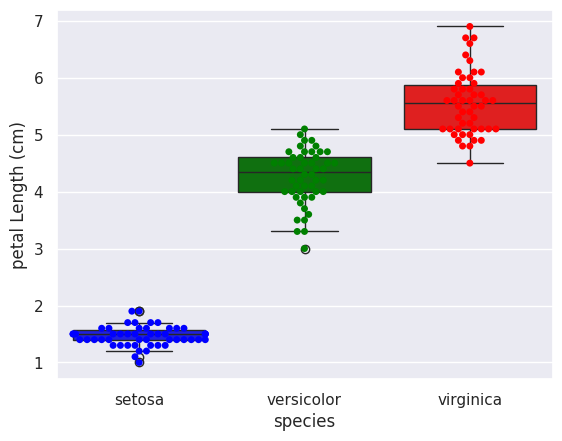

In [77]:
# Set seaborn style
sns.set()

# Create the boxplot
sns.boxplot(x='species', y='petal_length', data=iris, palette=palette)

# Create the swarmplot on top of the boxplot
sns.swarmplot(x='species', y='petal_length', hue='species', data=iris, palette=palette)

# Labels
plt.xlabel('species')
plt.ylabel('petal Length (cm)')

# Show plot
plt.show()


### Scatter plots, pair plots, and correlation between two variables

The code below:

1. Displays the pair plots for all (4) attributes for all (3) categories / species / classes in the Iris dataset.
2. Computes the covariance matrix for the versicolor species.
3. Computes the Pearson correlation coefficient between petal length and petal width for the versicolor species.


Pearson correlation coefficient between petal length and petal width for versicolor species: 0.78667


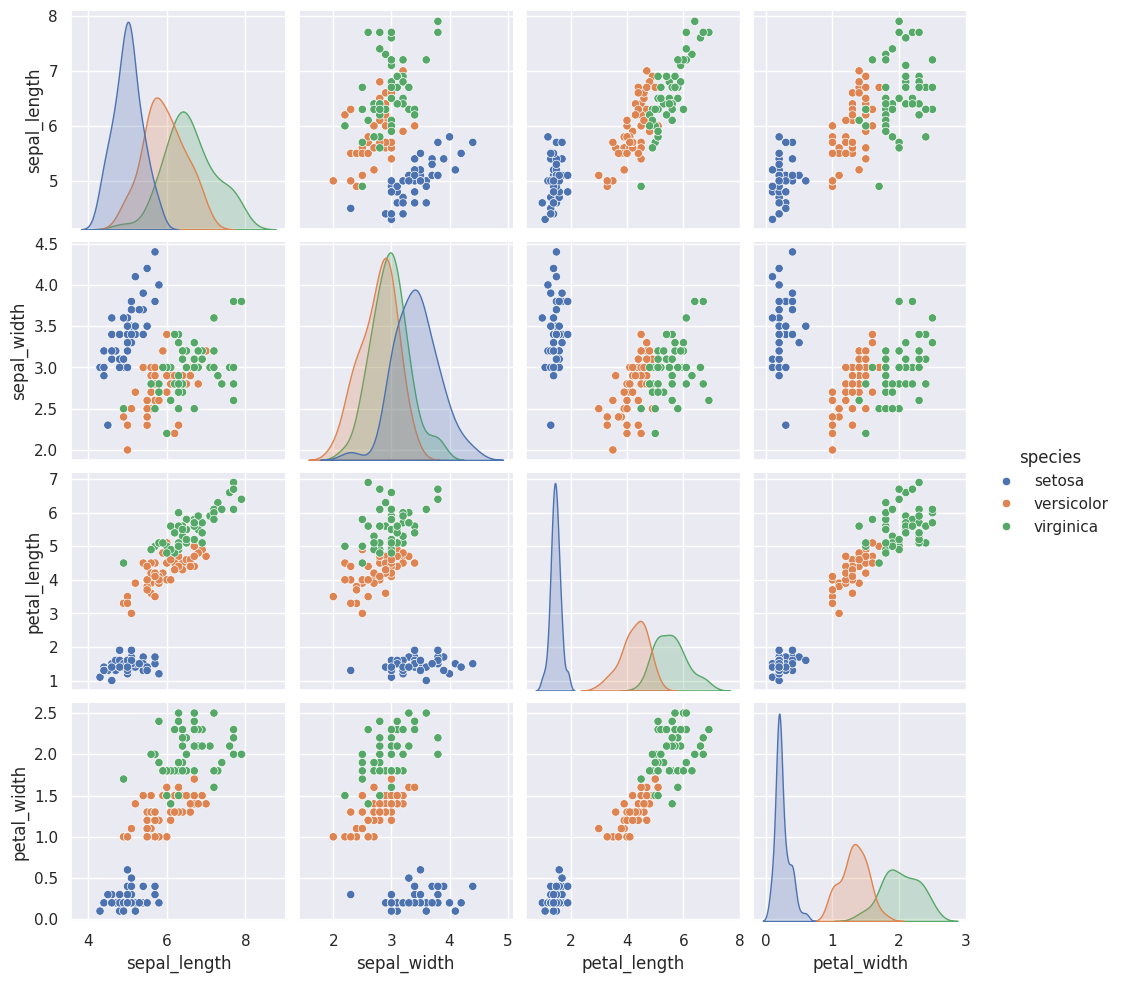

In [78]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Compute 1D arrays for petal length and width
versicolor_petal_width = iris[iris.species == 'versicolor'].petal_width
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)
print('Pearson correlation coefficient between petal length and petal width for versicolor species: {:.5f}'.format(r))

### 1.8 Bonus! (5 points)

Extend the code above to compute the Pearson correlation coeficients for all pair-wise combinations of all three Iris species and display the results in a table format.  

-------------------
## Part 2: Empirical distributions vs. analytic distributions

### Representative analytic distributions

In this part we will look at how to generate and plot analytic distributions.

The Python code below generates and plots the PDF and CDF of a normal (Gaussian) distribution whose parameters are *mu* and *sigma*.

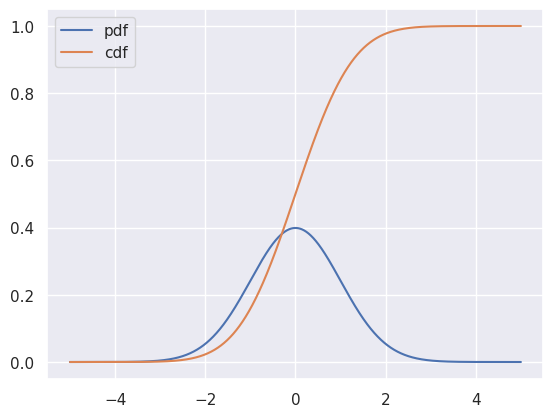

In [80]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = ss.norm.cdf(x, mu, sigma) # the normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend();

### 2.1 Your turn! (6 points, i.e., 3 pts each)

Write code to:

1. Plot the PDF of three exponential distributions (with *lambda* equal to 0.5, 1, and 2) on the same plot.
They will probably look like this:

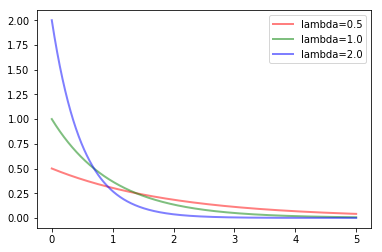

2. Plot the CDF of three exponential distributions (with *lambda* equal to 0.5, 1, and 2) on the same plot.

They will probably look like this:

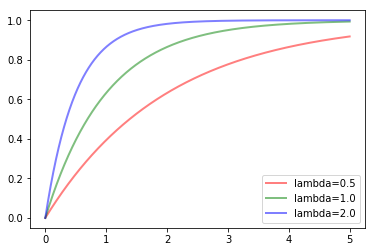

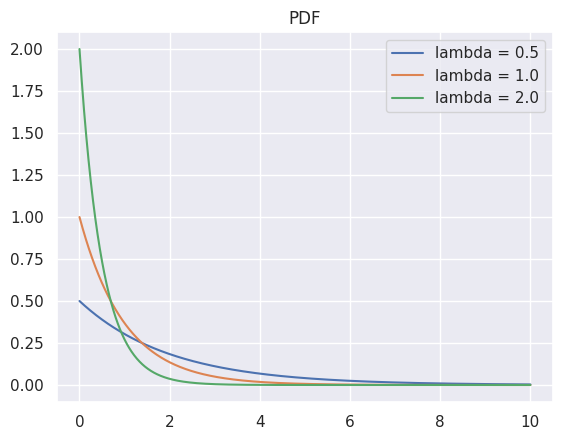

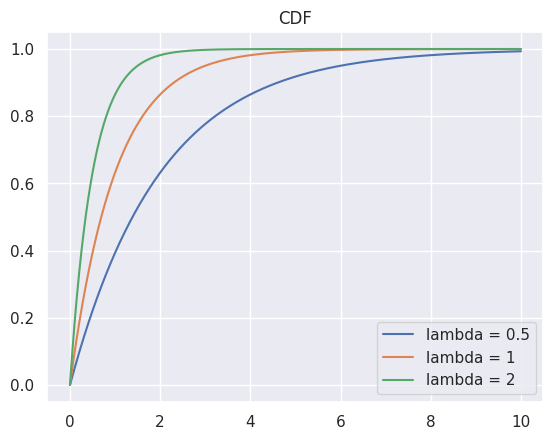

In [88]:
# Define range of x values
x = np.linspace(0, 10, 1000)

# Define lambda values and corresponding scale
lambdas = [0.5, 1.0, 2.0]
scales = [1 / lam for lam in lambdas]

# Plot PDFs for each lambda
for lam, scale in zip(lambdas, scales):
    y = ss.expon.pdf(x, scale=scale)
    plt.plot(x, y, label=f'lambda = {lam}')

# Label
plt.title('PDF')
plt.legend()

# Show the plot
plt.show()

# Define x-axis range
x = np.linspace(0, 10, 1000)

# Define lambda values and compute their scale
lambdas = [0.5, 1, 2]
scales = [1 / lam for lam in lambdas]

# Plot CDFs for each exponential distribution
for lam, scale in zip(lambdas, scales):
    y = ss.expon.cdf(x, scale=scale)
    plt.plot(x, y, label=f'lambda = {lam}')

# Label
plt.title('CDF')
plt.legend()

# Show
plt.show()

### How well can we model empirical distributions with analytic distributions?

Let's start by asking the question **Are the Belmont Stakes results normally distributed?**

*For context: Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. These two outliers have been removed from the data set, which has been obtained by scraping the Belmont Wikipedia page.* (The file ``belmont.csv`` is available [here](https://github.com/PBSC-Hammond/CAP2751/blob/main/belmont.csv), if you want to learn more about the race's results.)

The code below:
- computes mean and standard deviation of Belmont winners' times with the two outliers removed.
- takes 10,000 samples out of a normal distribution with this mean and standard deviation using
``np.random.normal()``.
- computes the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.
- plots the CDF of your samples with the ECDF, with labeled axes.

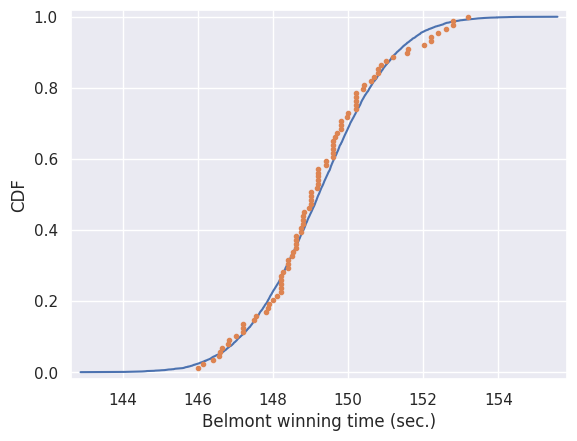

In [89]:
import numpy as np
import matplotlib.pyplot as plt

belmont_no_outliers = np.array([148.51,  146.65,  148.52,  150.7,  150.42,  150.88,  151.57,
                                147.54,  149.65,  148.74,  147.86,  148.75,  147.5,  148.26,
                                149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
                                152.02,  146.82,  149.97,  146.13,  148.1,  147.2,  146.,
                                146.4,  148.2,  149.8,  147.,  147.2,  147.8,  148.2,
                                149.,  149.8,  148.6,  146.8,  149.6,  149.,  148.2,
                                149.2,  148.,  150.4,  148.8,  147.2,  148.8,  149.6,
                                148.4,  148.4,  150.2,  148.8,  149.2,  149.2,  148.4,
                                150.2,  146.6,  149.8,  149.,  150.8,  148.6,  150.2,
                                149.,  148.6,  150.2,  148.2,  149.4,  150.8,  150.2,
                                152.2,  148.2,  149.2,  151.,  149.6,  149.6,  149.4,
                                148.6,  150.,  150.6,  149.2,  152.6,  152.8,  149.6,
                                151.6,  152.8,  153.2,  152.4,  152.2])

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Seed random number generator
np.random.seed(42)

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


### 2.2 Bonus! (10 points)

Let's try to answer the question: **What are the chances of a horse matching or beating Secretariat's record?**

Assuming that the Belmont winners' times are Normally distributed (with the 1970
and 1973 years removed), write Python code to answer the question: *What is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?*

Instructions:
- Take 1,000,000 samples from the normal distribution using the ``np.random.normal()`` function.
- Compute the mean ``mu`` and standard deviation ``sigma`` from the ``belmont_no_outliers`` array.
- Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.
- Print the result.


In [ ]:
# Enter your code here
# ...

### 2.3 Your turn (15 points)

Let's investigate whether the speed of light measurements by Michelson are normally distributed. (See [this video](https://www.youtube.com/watch?v=NxAwkraCaf8) to learn more about Michelson's rotating mirror experiment, if interested.)

The dataset (``michelson_speed_of_light.csv``) is available on Canvas and also [here](https://github.com/PBSC-Hammond/CAP2751/blob/main/michelson_speed_of_light.csv).

_Hint_: You are only interested in the *velocity of light in air (km/s)* column.

You should follow a similar sequence of steps as above, namely:
- Compute the mean ``mu`` and standard deviation ``sigma`` from the ``michelson_speed_of_light`` array.
- Take 10,000 samples out of a normal distribution with this mean and standard deviation using
``np.random.normal()``.
- Compute the CDF of the theoretical samples and the ECDF of the Michelson speed of light data, assigning the results to ``x_theor``, ``y_theor`` and ``x, y``, respectively.
- Plot the CDF of your samples with the ECDF, with labeled axes.

For more on Michelson: https://en.wikipedia.org/wiki/Albert_A._Michelson

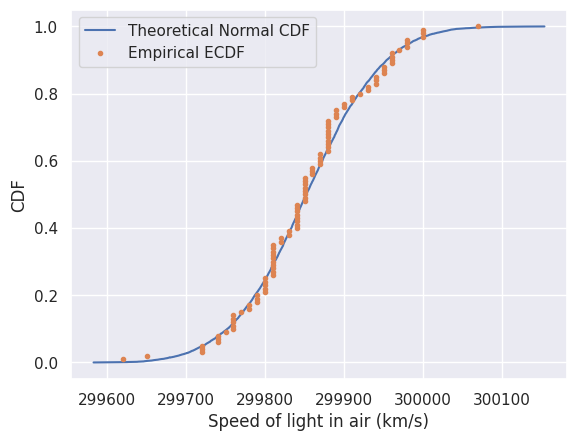

In [101]:

import pandas as pd
df = pd.read_csv("https://github.com/PBSC-Hammond/CAP2751/raw/main/michelson_speed_of_light.csv")

df.head()

# Extract the velocity of light in air (km/s) column
michelson_data = df['velocity of light in air (km/s)'].dropna().to_numpy()

# Compute mean and standard deviation
mu = np.mean(michelson_data)
sigma = np.std(michelson_data)

# Generate 10,000 samples from normal distribution with mu and sigma
samples = np.random.normal(mu, sigma, 10000)

# Compute ECDF for actual data and CDF for the theoretical samples
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

x_theor, y_theor = ecdf(samples)
x, y = ecdf(michelson_data)

# Plot ECDF and theoretical CDF
plt.plot(x_theor, y_theor, label='Theoretical Normal CDF')
plt.plot(x, y, marker='.', linestyle='none', label='Empirical ECDF')
plt.xlabel('Speed of light in air (km/s)')
plt.ylabel('CDF')
plt.legend()
plt.show()

------
## Part 3: Events over time

Next, let's turn our attention to baby births.

In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called *interarrival times*. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

We will use the dataset from ``babies_brisbane.csv`` (available [here](https://github.com/PBSC-Hammond/CAP2751/blob/main/babies_brisbane.csv)) containing information about the time of birth for  44 babies born in a hospital in Brisbane, Australia, on December 18, 1997, as reported in the local paper.



### 3.1: Your turn! (15 points)

You should write code to:
1. Read the data and build a Pandas dataframe.
2. Compute the reciprocal of the mean of the sample exponential distribution (call this ``lam``, since ``lambda`` is a reserved word in Python).
3. Take 10,000 samples out of an exponential distribution with this scale using
``np.random.exponential()``.
4. Compute the CDF of the theoretical samples and the ECDF of the sample data, assigning the results to ``x_theor``, ``y_theor`` and ``x, y``, respectively.
5. Plot the CDF of your samples with the ECDF, with labeled axes.
6. Compute the Complementary CDF (CCDF) and plot the CCDF for both theoretical and sample values, on a log-y scale.

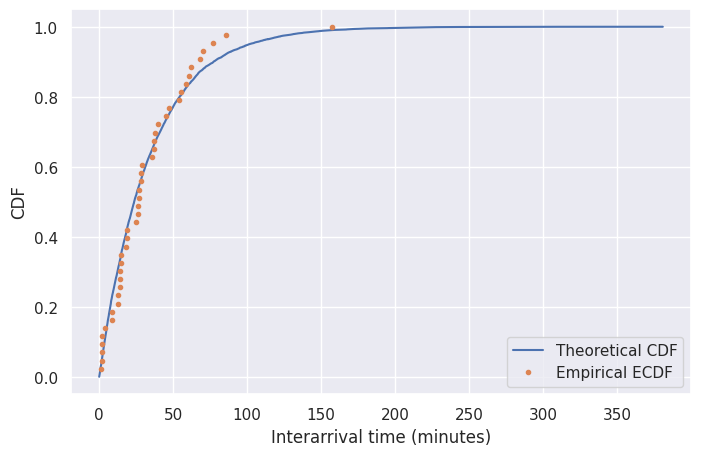

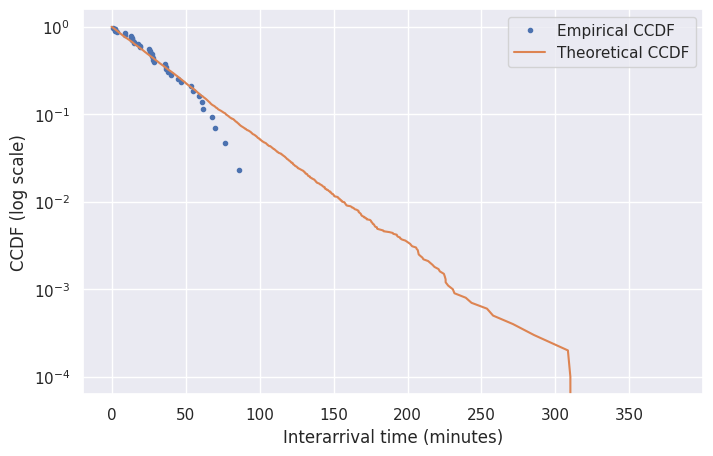

In [108]:
# Load the uploaded babies_brisbane.csv file
babies_df = pd.read_csv("https://raw.githubusercontent.com/PBSC-Hammond/CAP2751/main/babies_brisbane.csv")

# Display the first few rows
babies_df.head()

# Sort the data by time and compute interarrival times
arrival_times = np.sort(babies_df['minutes'].values)
interarrival_times = np.diff(arrival_times)  # differences between sorted times

# Compute lambda
lam = 1 / np.mean(interarrival_times)
scale = 1 / lam  # scale for exponential = mean interarrival time

# Generate 10,000 samples from exponential distribution
samples = np.random.exponential(scale=scale, size=10000)

# Compute ECDF and CDF
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y

x_theor, y_theor = ecdf(samples)
x, y = ecdf(interarrival_times)

# Plot ECDF and theoretical CDF
plt.figure(figsize=(8, 5))
plt.plot(x_theor, y_theor, label='Theoretical CDF')
plt.plot(x, y, marker='.', linestyle='none', label='Empirical ECDF')
plt.xlabel('Interarrival time (minutes)')
plt.ylabel('CDF')
plt.legend()
plt.show()

# Compute CCDFs (1 - CDF)
ccdf_empirical = 1 - y
ccdf_theoretical = 1 - y_theor

# Plot CCDFs on a log-y scale
plt.figure(figsize=(8, 5))
plt.plot(x, ccdf_empirical, marker='.', linestyle='none', label='Empirical CCDF')
plt.plot(x_theor, ccdf_theoretical, label='Theoretical CCDF')
plt.yscale('log')
plt.xlabel('Interarrival time (minutes)')
plt.ylabel('CCDF (log scale)')
plt.legend()
plt.show()


-------------------
## Part 4: Moments and skewness

Let's revisit the dataset of salaries from the [ICMLA 2019 Tutorial](https://github.com/fau-masters-collected-works-cgarbin/ieee-icmla-2019-data-science-tutorial) examples (notebooks 1 and 2) and use it to measure skewness.

### 4.1 Your turn! (10 points)

Write Python code to:
1. Read the `salaries.csv` file (also available [here](https://github.com/PBSC-Hammond/CAP2751/blob/main/salaries1.csv)), compute the median and mean salary for the entire sample.
2. Compute the first raw moment and show that it is equivalent to computing the mean value.
3. Compute the second central moment and show that it is equivalent to computing the variance.
4. Compute the [skewness](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.skew.html) (you might also want to use ``scipy.stats.skew``).

In [112]:
from scipy.stats import skew
salaries_df = pd.read_csv("https://raw.githubusercontent.com/PBSC-Hammond/CAP2751/main/salaries1.csv")
# Extract salary (earnings) column
salaries = salaries_df['earn'].dropna().to_numpy()

# Compute mean and median
mean_salary = np.mean(salaries)
median_salary = np.median(salaries)

# Compute first raw moment (mean)
first_raw_moment = np.mean(salaries)

# Compute second central moment (variance)
second_central_moment = np.mean((salaries - mean_salary) ** 2)
variance_salary = np.var(salaries)

# Compute skewness
skewness_manual = np.mean(((salaries - mean_salary) / np.std(salaries)) ** 3)
skewness_scipy = skew(salaries)

{
    "Mean": mean_salary,
    "Median": median_salary,
    "1st Raw Moment (Mean)": first_raw_moment,
    "2nd Central Moment (Variance)": second_central_moment,
    "Variance (np.var)": variance_salary,
    "Skewness (manual)": skewness_manual,
    "Skewness (scipy)": skewness_scipy
}


{'Mean': np.float64(23154.773489932886),
 'Median': np.float64(20000.0),
 '1st Raw Moment (Mean)': np.float64(23154.773489932886),
 '2nd Central Moment (Variance)': np.float64(378852251.6248677),
 'Variance (np.var)': np.float64(378852251.6248677),
 'Skewness (manual)': np.float64(2.880309741267592),
 'Skewness (scipy)': np.float64(2.880309741267592)}

### Questions (9 points, 3 pts each)

1. Explain the "binning bias" associated with histogram plots.

2. What is a bee swarm plot and in which situations should you (not) use it?

3. How do you interpret the value of skewness computed by your code in Part 4?

1. Binning bias happens when the way a histogram looks depends too much on the number of bins or where the bins start. If you choose different bin sizes, the shape of the graph can change and give a misleading view of the data. It can either hide or exaggerate patterns that aren’t really there.
2. A bee swarm plot shows all your individual data points spread out so they don’t overlap. This plot is great for when you have a smaller dataset and want to see every point clearly. But if you have too many points, it gets cluttered and difficult to read.
3. In Part 4, the skewness came out to about 2.88, which means the data is heavily right-skewed. Most of the salaries are on the lower side, with a few really high ones pulling the average up. This kind of skew is normal for income data since a small number of people usually make a lot more than the rest.

### Conclusions (16 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

1. What have you learned from this assignment?
  - From this assignment, I learned how to compare empirical data with theoretical distributions using tools like histograms, ECDFs, CDFs, and CCDFs. I also learned how to compute statistical moments like mean, variance, and skewness, and how they help describe the shape of a dataset.

2. Which parts were the most fun, time-consuming, enlightening, tedious?
  - The most fun part was plotting the ECDFs and visually comparing the data. It helped me better understand how different distributions work in real-world situations, like salaries or baby birth times. The most time-consuming and tedious part was fixing small errors and repeating similar plotting steps.

3. What would you do if you had an additional week to work on this?
  - If I had an extra week, I would explore more real datasets and try using other distributions to model the data.